# Twitter Sentiment Analysis
## By Karim Elshetihy
- [Github](https://github.com/KarimElshetihy)
- [Linkedin](https://www.linkedin.com/in/karim-el-shetihy/)

#### Referances:
- [Sentiment Analysis of Twitter Data: A Survey of Techniques](https://arxiv.org/ftp/arxiv/papers/1601/1601.06971.pdf)
- [Twitter Sentiment Analysis in Real-Time](https://monkeylearn.com/blog/sentiment-analysis-of-twitter/)
- [Text Data Cleaning - tweets analysis](https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis)
- [A Beginner’s Guide to Sentiment Analysis with Python](https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6)
- [Sentiment analysis on streaming Twitter data using Spark Structured Streaming & Python](https://towardsdatascience.com/sentiment-analysis-on-streaming-twitter-data-using-spark-structured-streaming-python-fc873684bfe3)
- [Beginners Guide - How to apply for a Twitter Developer account](https://dev.to/sumedhpatkar/beginners-guide-how-to-apply-for-a-twitter-developer-account-1kh7)
- [Streaming ML pipeline for Sentiment Analysis using Apache APIs: Kafka, Spark and Drill](https://developer.hpe.com/blog/streaming-ml-pipeline-for-sentiment-analysis-using-apache-apis-kafka-spark-and-drill-part-2/)
- []()

#### The Dataset:
- [sentiment140 dataset](https://www.kaggle.com/kazanova/sentiment140)

____________

### Loading and Exploring the Dataset

#### Importing Packages

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
%matplotlib inline
sb.set_theme()

import warnings
warnings.filterwarnings('ignore')

import re
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [19]:
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1", names=['Sentiment', 'ID', 'TimeStamp', 'Query', 'User', 'Tweet'])
df = data.copy()

In [20]:
df.head()

,Sentiment,ID,TimeStamp,Query,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.shape

(1600000, 6)

In [5]:
df.describe()

,Sentiment,ID
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1600000 non-null  int64 
 1   ID         1600000 non-null  int64 
 2   TimeStamp  1600000 non-null  object
 3   Query      1600000 non-null  object
 4   User       1600000 non-null  object
 5   Tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
df.isnull().sum()

Sentiment    0
ID           0
TimeStamp    0
Query        0
User         0
Tweet        0
dtype: int64

In [8]:
df.nunique()

Sentiment          2
ID           1598315
TimeStamp     774363
Query              1
User          659775
Tweet        1581466
dtype: int64

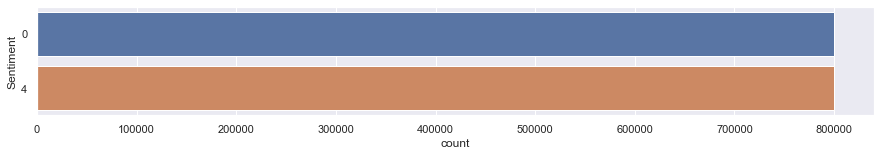

In [10]:
plt.figure(figsize=(15,2))
sb.countplot(y=df['Sentiment']);

In [10]:
df.duplicated().sum()

0

### About the Dataset:

### The structure of the dataset:

It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 2 = neutral, 4 = positive) and they can be used to detect sentiment .
It contains the following 6 fields:

- **target**: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- **ids**: The id of the tweet ( 2087)
- **date**: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- **flag**: The query (lyx). If there is no query, then this value is NO_QUERY.
- **user**: the user that tweeted (robotickilldozr)
- **text**: the text of the tweet (Lyx is cool)

**There are 1,600,000 tweet in the dataset, 50% are positive and 50% are negative, and no neutral tweets.**

____________

### Exploratory Data Analysis

In [12]:
# from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# # Start with one review:
# df_ADR = tweetdf_df[df['ADR_label']==4]
# df_NADR = df[df['ADR_label']==0]
# tweet_All = " ".join(review for review in df.Tweet)
# tweet_ADR = " ".join(review for review in df_ADR.Tweet)
# tweet_NADR = " ".join(review for review in df_NADR.Tweet)

# fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# # Create and generate a word cloud image:
# wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
# wordcloud_ADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_ADR)
# wordcloud_NADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NADR)

# # Display the generated image:
# ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
# ax[0].set_title('All Tweets', fontsize=30)
# ax[0].axis('off')
# ax[1].imshow(wordcloud_ADR, interpolation='bilinear')
# ax[1].set_title('Tweets under ADR Class',fontsize=30)
# ax[1].axis('off')
# ax[2].imshow(wordcloud_NADR, interpolation='bilinear')
# ax[2].set_title('Tweets under None - ADR Class',fontsize=30)
# ax[2].axis('off')

# #wordcloud.to_file("img/first_review.png")

____________

### Cleaning Tweets

#### Pre-processing of the datasets
A tweet contains a lot of opinions about the data which are expressed in different ways by different users .The twitter dataset used in this survey work is already labeled into two classes viz. negative and positive polarity and thus the sentiment analysis of the data becomes easy to observe the effect of various features. The raw data having polarity is highly susceptible to inconsistency and redundancy. Preprocessing of tweet include following points,
- Remove all URLs (e.g. www.xyz.com), hash tags (e.g. #topic), targets (@username)
- Correct the spellings; sequence of repeated characters is to be handled
- Replace all the emoticons with their sentiment.
- Remove all punctuations ,symbols, numbers
- Remove Stop Words
- Expand Acronyms(we can use a acronym dictionary)
- Remove Non-English Tweets

#### Removing unuseful Columns

In [21]:
df.drop(['TimeStamp','Query','User'], axis=1, inplace=True)

In [22]:
df.head()

,Sentiment,ID,Tweet
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,is upset that he can't update his Facebook by ...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,my whole body feels itchy and like its on fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all...."


#### Making Positive Sentiments equal to 1, and Negative Sentiments equal to 0

In [33]:
df['Sentiment'] = df['Sentiment'].replace({4 : 1})

In [34]:
df['Sentiment'].unique()

array([0, 1], dtype=int64)

### Functions

#### Cleaning

In [49]:
def Clean(x):
    """
    This function is made to clean the tweets using regex or regular expressions,
    it removes:
    - Usernames: @[A-Za-z0-9]
    - URLs: \w+:\/\/\S+
    - Punctuations & Numbers: [^0-9A-Za-z \t]
#     text_rc = re.sub('[0-9]+', '', text_lc)
    
    
    """
    
    text  = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())
    text = re.sub('[0-9]+', '', text)
    
    return text

#### Tokenization

In [25]:
def tokenization(text):
    """
    Extracts tokens
    
    Tokenization is the process of turning a meaningful piece of data, such as an account number, 
    into a random string of characters called a token that has no meaningful value if breached. 
    Tokens serve as reference to the original data, but cannot be used to guess those values.
    """
    text = re.split('\W+', text)
    return text

#### Stop Words Remover

In [28]:
# nltk.download('stopwords')

In [29]:
stopword = nltk.corpus.stopwords.words('english')

In [30]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

#### Stemming

In [31]:
ps = nltk.PorterStemmer()

def stemming(text):
    """
    Stemming algorithms work by cutting off the end or the beginning of the word, 
    taking into account a list of common prefixes and suffixes that can be found in an inflected word. 
    This indiscriminate cutting can be successful in some occasions, but not always, 
    and that is why we affirm that this approach presents some limitations.

    """
    
    text = [ps.stem(word) for word in text]
    return text

#### Word Lemmatization

In [ ]:
# nltk.download('wordnet')

In [32]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    """
    Lemmatization, on the other hand, takes into consideration the morphological analysis of the words. To do so, 
    it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma.
    """
    text = [wn.lemmatize(word) for word in text]
    return text

#### Cleaning

In [24]:
df['Tweet_Cleaned'] = df['Tweet'].apply(lambda x: Clean(x))
df.head()

,Sentiment,ID,Tweet,Tweet_Cleaned
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Awww that s a bummer You shoulda got David Car...
1,0,1467810672,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to sav...
3,0,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am i h...


#### Tokenization

In [40]:
df['Tweet_Tokenized'] = df['Tweet_Cleaned'].apply(lambda x: tokenization(x.lower()))
df.head()

,Sentiment,ID,Tweet,Tweet_Cleaned,Tweet_tokenized,Tweet_Tokenized
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Awww that s a bummer You shoulda got David Car...,"[awww, that, s, a, bummer, you, shoulda, got, ...","[awww, that, s, a, bummer, you, shoulda, got, ..."
1,0,1467810672,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...,"[is, upset, that, he, can, t, update, his, fac...","[is, upset, that, he, can, t, update, his, fac..."
2,0,1467810917,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to sav...,"[i, dived, many, times, for, the, ball, manage...","[i, dived, many, times, for, the, ball, manage..."
3,0,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[my, whole, body, feels, itchy, and, like, its..."
4,0,1467811193,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am i h...,"[no, it, s, not, behaving, at, all, i, m, mad,...","[no, it, s, not, behaving, at, all, i, m, mad,..."


#### Removing Stop Words 

In [41]:
df['Tweet_Nonstop'] = df['Tweet_Tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

,Sentiment,ID,Tweet,Tweet_Cleaned,Tweet_tokenized,Tweet_Tokenized,Tweet_Nonstop
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Awww that s a bummer You shoulda got David Car...,"[awww, that, s, a, bummer, you, shoulda, got, ...","[awww, that, s, a, bummer, you, shoulda, got, ...","[awww, bummer, shoulda, got, david, carr, thir..."
1,0,1467810672,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...,"[is, upset, that, he, can, t, update, his, fac...","[is, upset, that, he, can, t, update, his, fac...","[upset, update, facebook, texting, might, cry,..."
2,0,1467810917,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to sav...,"[i, dived, many, times, for, the, ball, manage...","[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, 50, ..."
3,0,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]"
4,0,1467811193,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am i h...,"[no, it, s, not, behaving, at, all, i, m, mad,...","[no, it, s, not, behaving, at, all, i, m, mad,...","[behaving, mad, see]"


#### Stemming

In [42]:
df['Tweet_Stemmed'] = df['Tweet_Nonstop'].apply(lambda x: stemming(x))
df.head()

,Sentiment,ID,Tweet,Tweet_Cleaned,Tweet_tokenized,Tweet_Tokenized,Tweet_Nonstop,Tweet_Stemmed
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Awww that s a bummer You shoulda got David Car...,"[awww, that, s, a, bummer, you, shoulda, got, ...","[awww, that, s, a, bummer, you, shoulda, got, ...","[awww, bummer, shoulda, got, david, carr, thir...","[awww, bummer, shoulda, got, david, carr, thir..."
1,0,1467810672,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...,"[is, upset, that, he, can, t, update, his, fac...","[is, upset, that, he, can, t, update, his, fac...","[upset, update, facebook, texting, might, cry,...","[upset, updat, facebook, text, might, cri, res..."
2,0,1467810917,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to sav...,"[i, dived, many, times, for, the, ball, manage...","[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, 50, ...","[dive, mani, time, ball, manag, save, 50, rest..."
3,0,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]","[whole, bodi, feel, itchi, like, fire]"
4,0,1467811193,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am i h...,"[no, it, s, not, behaving, at, all, i, m, mad,...","[no, it, s, not, behaving, at, all, i, m, mad,...","[behaving, mad, see]","[behav, mad, see]"


#### Word Lemmatization

In [43]:
df['Tweet_Lemmatized'] = df['Tweet_Stemmed'].apply(lambda x: lemmatizer(x))
df.head()

,Sentiment,ID,Tweet,Tweet_Cleaned,Tweet_tokenized,Tweet_Tokenized,Tweet_Nonstop,Tweet_Stemmed,Tweet_Lemmatized
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Awww that s a bummer You shoulda got David Car...,"[awww, that, s, a, bummer, you, shoulda, got, ...","[awww, that, s, a, bummer, you, shoulda, got, ...","[awww, bummer, shoulda, got, david, carr, thir...","[awww, bummer, shoulda, got, david, carr, thir...","[awww, bummer, shoulda, got, david, carr, thir..."
1,0,1467810672,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...,"[is, upset, that, he, can, t, update, his, fac...","[is, upset, that, he, can, t, update, his, fac...","[upset, update, facebook, texting, might, cry,...","[upset, updat, facebook, text, might, cri, res...","[upset, updat, facebook, text, might, cri, res..."
2,0,1467810917,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to sav...,"[i, dived, many, times, for, the, ball, manage...","[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, 50, ...","[dive, mani, time, ball, manag, save, 50, rest...","[dive, mani, time, ball, manag, save, 50, rest..."
3,0,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]","[whole, bodi, feel, itchi, like, fire]","[whole, bodi, feel, itchi, like, fire]"
4,0,1467811193,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am i h...,"[no, it, s, not, behaving, at, all, i, m, mad,...","[no, it, s, not, behaving, at, all, i, m, mad,...","[behaving, mad, see]","[behav, mad, see]","[behav, mad, see]"


#### Final Results

In [47]:
df['Tweet_Results'] = df['Tweet_Lemmatized'].apply(lambda x: Clean(str(x)))
df.head()

,Sentiment,ID,Tweet,Tweet_Cleaned,Tweet_tokenized,Tweet_Tokenized,Tweet_Nonstop,Tweet_Stemmed,Tweet_Lemmatized,Tweet_Results
0,0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Awww that s a bummer You shoulda got David Car...,"[awww, that, s, a, bummer, you, shoulda, got, ...","[awww, that, s, a, bummer, you, shoulda, got, ...","[awww, bummer, shoulda, got, david, carr, thir...","[awww, bummer, shoulda, got, david, carr, thir...","[awww, bummer, shoulda, got, david, carr, thir...",awww bummer shoulda got david carr third day
1,0,1467810672,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...,"[is, upset, that, he, can, t, update, his, fac...","[is, upset, that, he, can, t, update, his, fac...","[upset, update, facebook, texting, might, cry,...","[upset, updat, facebook, text, might, cri, res...","[upset, updat, facebook, text, might, cri, res...",upset updat facebook text might cri result sch...
2,0,1467810917,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to sav...,"[i, dived, many, times, for, the, ball, manage...","[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, 50, ...","[dive, mani, time, ball, manag, save, 50, rest...","[dive, mani, time, ball, manag, save, 50, rest...",dive mani time ball manag save 50 rest go bound
3,0,1467811184,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]","[whole, bodi, feel, itchi, like, fire]","[whole, bodi, feel, itchi, like, fire]",whole bodi feel itchi like fire
4,0,1467811193,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am i h...,"[no, it, s, not, behaving, at, all, i, m, mad,...","[no, it, s, not, behaving, at, all, i, m, mad,...","[behaving, mad, see]","[behav, mad, see]","[behav, mad, see]",behav mad see


In [48]:
countVector = countVectorizer.fit_transform(df['Tweet_Results'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
# print(countVectorizer.get_feature_names())

1600000 Number of tweets has 221484 words
['', 'a', 'aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaa', 'aaaaaaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaah', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaargh', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaall', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaao', 'aaaaaaaaaaaaaaaaaaaaaaaaaargh', 'aaaaaaaaaaaaaaaaaaaaaaah', 'aaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh', 'aaaaaaaaaaaaaaaaaaaaaaahrg', 'aaaaaaaaaaaaaaaaaaaaah', 'aaaaaaaaaaaaaaaaaaaaahhhhh', 'aaaaaaaaaaaaaaaaaaaah', 'aaaaaaaaaaaaaaaa

In [58]:
df.to_csv('Tweets_Results.csv', index=False)

### Cleaning Report
1. First, the tweets content has been cleaned from usernames, urls, hashtags, numbers, and puncetuations using **re** python library. 

2. The tweets were converted to tokens using nltk tokenization.

3. Stop words were removed, because they are not important words that will affect the sentiment analysis.

4. Each word were converted to its stem.

5. Apply lemmitization on each stemmed word and producing the final results.

____________

### Sentiment Analysis Model

#### Feature Extraction
The preprocessed dataset has many distinctive properties. In the feature extraction method, we extract the aspects from the processed dataset. Later this aspect are used to compute the positive and negative polarity in a sentence which is useful for determining the opinion of the individuals using models like unigram, bigram.
Machine learning techniques require representing the key features of text or documents for processing. These key features are considered as feature vectors which are used for the classification task.

Some examples features that have been reported in literature are:
1. **Words And Their Frequencies**:
Unigrams, bigrams and n-gram models with their frequency counts are considered as features. There has been more research on using word presence rather than frequencies to better describe this feature. Panget al. showed better results by using presence instead of frequencies.
2. **Parts Of Speech Tags**
Parts of speech like adjectives, adverbs and somegroups of verbs and nouns are good indicators of subjectivity and sentiment. We can generate syntactic dependency patterns by parsing or dependency trees.
3. **Opinion Words And Phrases**
Apart from specific words, some phrases and idioms which convey sentiments can be used as features.
e.g. cost someone an arm and leg.
4. **Position Of Terms**
The position of a term with in a text can affect on how much the term makes difference in overall sentiment of the text.
5. **Negation**
Negation is an important but difficult feature to interpret. The presence of a negation usually changes the polarity of the opinion.
6. **Syntax**
Syntactic patterns like collocations are used as features to
learn subjectivity patterns by many of the researchers.

### Classification
- Naive Bayes:
It is a probabilistic classifier and can learn the pattern of
examining a set of documents that has been categorized. It
compares the contents with the list of words to classify the
documents to their right category or class. Let d be the tweet
and c* be a class that is assigned to d, where

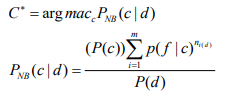

From the above equation, „f‟ is a „feature‟, count of feature (fi)
is denoted with ni(d) and is present in d which represents a
tweet. Here, m denotes no. of features.
Parameters P(c) and P(f|c) are computed through maximum
likelihood estimates, and smoothing is utilized for unseen
features. To train and classify using Naïve Bayes Machine
Learning technique ,we can use the Python NLTK library .

- Maximum Entropy
In Maximum Entropy Classifier, no assumptions are taken
regarding the relationship in between the features extracted
from dataset. This classifier always tries to maximize the
entropy of the system by estimating the conditional distribution
of the class label.
Maximum entropy even handles overlap feature and is same as
logistic regression method which finds the distribution over
classes. The conditional distribution is defined as MaxEnt
makes no independence assumptions for its features, unlike
Naive Bayes.
The model is represented by the following:

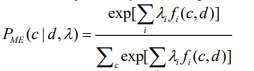


Where c is the class,d is the tweet and λiis the weight
vector.The weight vectors decide the importance of a feature in
classification.

- Support Vector Machine:
Support vector machine analyzes the data, define the decision
boundaries and uses the kernels for computation which are
performed in input space. The input data are two sets of
vectors of size m each. Then every data which represented as a
vector is classified into a class. Nextly we find a margin
between the two classes that is far from any document. The
distance defines the margin of the classifier, maximizing the
margin reduces indecisive decisions. SVM also supports
classification and regression which are useful for statistical
learning theory and it also helps recognizing the factors
precisely, that needs to be taken into account, to understand it
successfully.

#### APPROACHES FOR SENTIMENT ANALYSIS
There are mainly two techniques for sentiment analysis for the
twitter data:

1. Machine Learning Approaches:
Machine learning based approach uses classification technique
to classify text into classes. There are mainly two types of
machine learning techniques


2. Unsupervised learning:
It does not consist of a category and they do not provide with
the correct targets at all and therefore rely on clustering.


3. Supervised learning:
It is based on labeled dataset and thus the labels are provided to
the model during the process. These labeled dataset are trained
to get meaningful outputs when encountered during decisionmaking.
The success of both this learning methods is mainly depends on
the selection and extraction of the specific set of features used
to detect sentiment.


The machine learning approach applicable to sentiment
analysis mainly belongs to supervised classification. In a
machine learning techniques, two sets of data are needed:
1. Training Set
2. Test Set.
    
    
A number of machine learning techniques have been
formulated to classify the tweets into classes. Machine learning
techniques like Naive Bayes (NB), maximum entropy (ME),
and support vector machines (SVM) have achieved great
success in sentiment analysis.
Machine learning starts with collecting training dataset. Nextly
we train a classifier on the training data. Once a supervised
classification technique is selected, an important decision to
make is to select feature. They can tell us how documents are
represented.
The most commonly used features in sentiment classification
are
- Term presence and their frequency
- Part of speech information
- Negations
- Opinion words and phrases

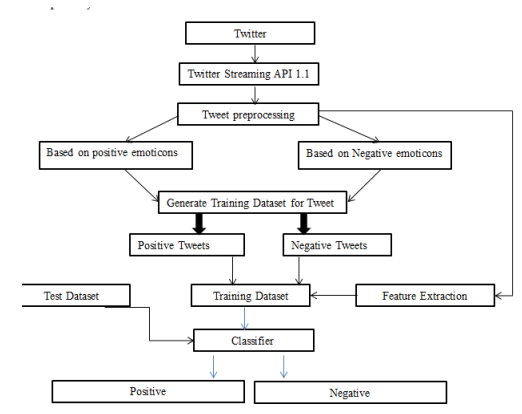

#### Logistic Regression Model

In [ ]:
data = pd.read_csv('Tweets_Results.csv')
model_df = data.copy()

In [ ]:
model_df.head()

In [ ]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(model_df['Tweet_Results'], model_df['Sentiment'], 
                                                    test_size=0.25, random_state=44, shuffle =True)

In [ ]:
# count vectorizer:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(X_train.astype(str))
test_matrix = vectorizer.transform(X_test.astype(str))

In [ ]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(train_matrix,y_train)

In [ ]:
# Make predictions
predictions = LR.predict(test_matrix)

In [ ]:
# find accuracy, precision, recall:
confusion_matrix(predictions,y_test)

In [ ]:
accuracy_score(predictions,y_test)

In [ ]:
print(classification_report(predictions,y_test))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(model_df['Tweet_Results'], model_df['Sentiment'], stratify=model_df['Sentiment'], 
                                                    test_size=0.25, random_state=44, shuffle =True)

In [ ]:
# Vectorize text reviews to numbers
vectorizer = CountVectorizer(stop_words='english')
train_matrix = vectorizer.fit_transform(X_train).toarray()
test_matrix = vectorizer.transform(X_test).toarray()

In [ ]:
NB = MultinomialNB()
NB.fit(train_matrix, y_train)

In [ ]:
NB.score(x_test, y_test)

In [ ]:
NB.predict(vectorizer.transform(['Love this app simply awesome!']))

____________

### Conclusion
- 
- 
- 

### Limitations
- Sentiment results are only 2, 0 for negative and 4 for positive, not as it was described on Kaggle description.
- 
- 